In [2]:
import subprocess
import pickle
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import pandas as pd
from astropy.io import fits
#import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

In [3]:
df=pd.read_csv('mki_data.csv')

In [42]:
df=df.replace('n/a', np.nan)
df=df.replace('Reppaport','Rappaport')
df=df.replace('Burles','Burke')
df

,Graduated PhD,Area,Supervisor,Supervisor1,Supervisor2,Degree/Year,Degree,Year,Company Name,Country,Career Type,Title
0,"Miller, Jon",ASTRX,Lewin,Lewin,NaN,PhD 2002,PhD,2002,University of Michigan,USA,Academic,Associate Professor
1,"Monnelly, Glen",ASTRX,Ricker,Ricker,NaN,PhD 2002,PhD,2002,Danske Bank,USA,Outside Industry,Senior Portfolio Manager
2,"Morgan, Nicholas",ASTRT,Schechter,Schechter,NaN,PhD 2002,PhD,2002,"Westport Board of Education, CT",USA,K-12,Physics & Science Research Teacher
3,"Muno, Michael",ASTRX,Chakrabarty/Remillard,Chakrabarty,Remillard,PhD 2002,PhD,2002,MIT Lincoln Laboratory,USA,Scientific Research,Technical Staff
4,"Pfahl, Eric",ASTRX,Rappaport,Rappaport,NaN,PhD 2002,PhD,2002,Institute for Defense Analyses,USA,Nonprofit,Research Staff
5,"Sylvestre, Julien",ASTRX,Weiss,Weiss,NaN,PhD 2002,PhD,2002,IBM Canada,Canada,Outside Industry,Principal Engineer
6,"Butler, Nathaniel",ASTRX,Ricker/Rappaport,Ricker,Rappaport,PhD 2003,PhD,2003,Arizona State University,USA,Academic,Assistant Professor
7,"Kasper, Justin",ASTRX,Lazarus,Lazarus,NaN,PhD 2003,PhD,2003,University of Michigan,USA,Academic,Associate Professor(also CFA affiliate)
8,"Lawrence, Ryan",ASTRX,Weiss,Weiss,NaN,PhD 2003,PhD,2003,MIT-Lincoln Lab,USA,Scientific Research,Technical Staff
9,"Pooley, David",ASTRX,Lewin,Lewin,NaN,PhD 2003,PhD,2003,Sam Houston State University,USA,Academic,Assistant Professor


In [36]:
df2=df.groupby(['Career Type'])

In [37]:
df2.describe()

Year
Career Type                            
Academic             count    17.000000
                     mean   2005.235294
                     std       2.278415
                     min    2002.000000
                     25%    2003.000000
                     50%    2005.000000
                     75%    2007.000000
                     max    2010.000000
K-12                 count     2.000000
                     mean   2005.000000
                     std       4.242641
                     min    2002.000000
                     25%    2003.500000
                     50%    2005.000000
                     75%    2006.500000
                     max    2008.000000
Medical Industry     count     3.000000
                     mean   2006.666667
                     std       4.618802
                     min    2004.000000
                     25%    2004.000000
                     50%    2004.000000
                     75%    2008.000000
                     max    2012.000000
Nonprofit            count     2.000000
                     mean   2003.000000
                     std       1.414214
                     min    2002.000000
                     25%    2002.500000
                     50%    2003.000000
                     75%    2003.500000
                     max    2004.000000
Outside Industry     count    24.000000
                     mean   2007.875000
                     std       3.814304
                     min    2002.000000
                     25%    2004.750000
                     50%    2008.000000
                     75%    2011.250000
                     max    2013.000000
Postdoc              count    23.000000
                     mean   2010.565217
                     std       1.829707
                     min    2007.000000
                     25%    2009.000000
                     50%    2011.000000
                     75%    2012.000000
                     max    2013.000000
Scientific Research  count     9.000000
                     mean   2006.222222
                     std       2.862594
                     min    2002.000000
                     25%    2005.000000
                     50%    2006.000000
                     75%    2008.000000
                     max    2011.000000

--Academic--
('University of Michigan', 'Associate Professor', 2002)
('Arizona State University', 'Assistant Professor', 2003)
('University of Michigan', 'Associate Professor(also CFA affiliate)', 2003)
('Sam Houston State University', 'Assistant Professor', 2003)
('Mount Holyoke College', 'Assistant Professor', 2003)
('Caltech', 'Professor', 2004)
('University of California, Santa Cruz', 'Assistant Professor', 2004)
('Shanghai Astronomical Observatory', 'Professor', 2004)
('University of Utah', 'Assistant Professor', 2005)
('Tennessee State University', 'Assistant Professor', 2005)
('Syracuse Univesity', 'Professor', 2006)
('Arizona State University', 'Assistant Professor', 2007)
('University of Tokyo', 'Professor', 2007)
('Louisiana State University', 'Assistant Professor', 2008)
('UC Davis', 'Lecturer', 2010)
('Georgia Tech', 'Assistant Professor', 2007)
('NC State University', 'Assistant Professor', 2008)

--K-12--
('Westport Board of Education, CT', 'Physics & Science Research Tea

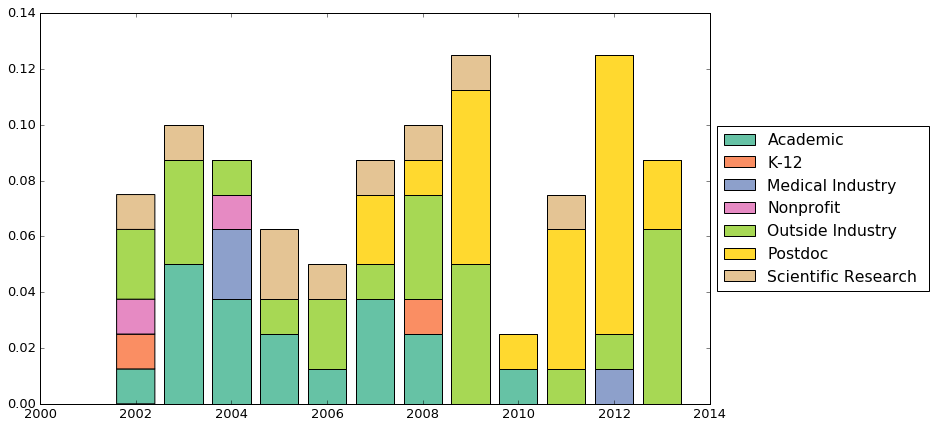

In [65]:
NUM_COLORS=7
cm = plt.get_cmap('Set2')
df2=df.groupby(['Career Type'])
bins=np.arange(13)+2002.-0.5
#n=np.arange(13)+2002.
#x_label=['%i' % i for i in n]
y=[group['Year'] for name, group in df2]
names=[str(name) for name, group in df2]

fig,ax=plt.subplots(figsize=(15,7))
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
plot=ax.hist(y, bins=bins, stacked=True, normed = True, label=names)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels(x_label)

for name, group in df2:
    print "--"+name+"--"
    for i in zip(group['Company Name'].values,group['Title'].values,group['Year'].values):
        print i
    print ""
    #print "; ".join(group['Title'].values)
    #print "; ".join(group['Company Name'].values)

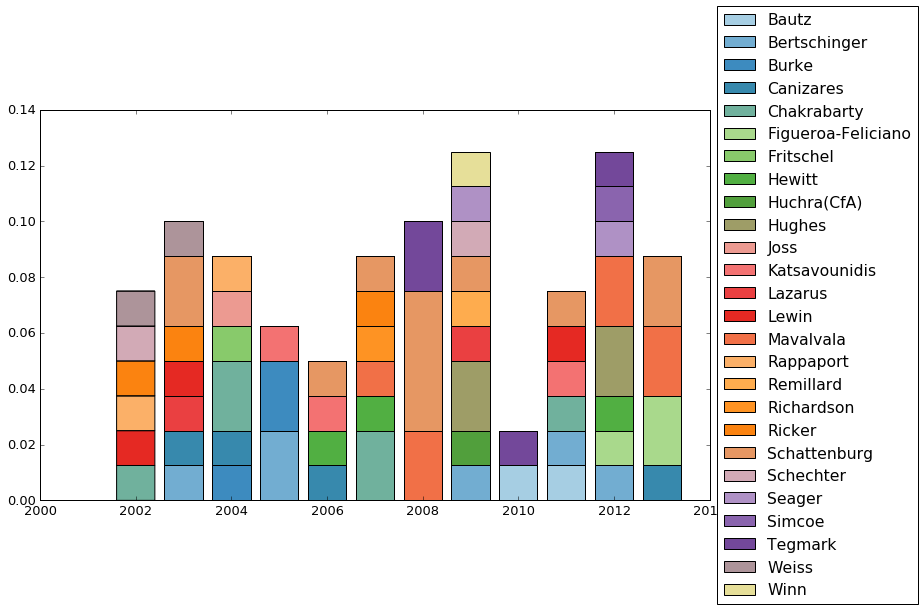

In [43]:
NUM_COLORS = 28

cm = plt.get_cmap('Paired')
df2=df.groupby(['Supervisor1'])
bins=np.arange(13)+2002.-0.5
#n=np.arange(13)+2002.
#x_label=['%i' % i for i in n]
y=[group['Year'] for name, group in df2]
names=[str(name) for name, group in df2]

fig,ax=plt.subplots(figsize=(15,7))
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.hist(y, bins=bins, alpha=1.0, stacked=True, normed = True, label=names)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels(x_label)

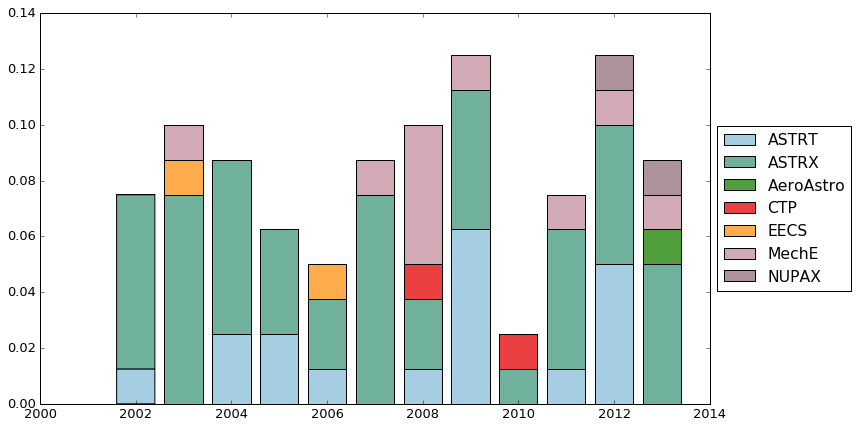

In [29]:
NUM_COLORS = 7

cm = plt.get_cmap('Paired')
df2=df.groupby(['Area'])
bins=np.arange(13)+2002.-0.5
#n=np.arange(13)+2002.
#x_label=['%i' % i for i in n]
y=[group['Year'] for name, group in df2]
names=[str(name) for name, group in df2]

fig,ax=plt.subplots(figsize=(15,7))
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.hist(y, bins=bins, alpha=1.0, stacked=True, normed = True, label=names)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels(x_label)

In [17]:
?plt.get_cmap

In [135]:
df3=df2=df.groupby(['Career Type','Year'])
x=[group['Title'] for name, group in df3]

[', '.join(group['Title'].values) for name, group in df3 if name[0]=='Academic']

In [160]:
a=['a','b','c']

In [163]:
','.join(a)

'a,b,c'